In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import kurtosis
from scipy.stats import skew

In [2]:
traindata = pd.read_csv('smalldata.txt', sep = ',') #5136
import numpy as np
t = np.zeros(6000) #time
w = np.zeros(6000) #address
x = np.zeros(6000) #column
y = np.zeros(6000) #row
z = np.zeros(6000) #delay
a = np.zeros(6000) #addressgrowth
b = np.zeros(6000) #columngrowth
c = np.zeros(6000) #rowgrowth
d = np.zeros(6000) #timegrowth

In [3]:
#Filling the arrays with corresponding data

for i in range (0, 5136):
    w[i] = traindata.address[i+1] - traindata.address[i]
    
for i in range (0, 5136):
    x[i] = traindata.column[i+1] - traindata.column[i]
    
for i in range (0, 5136):
    y[i] = traindata.row[i+1] - traindata.row[i]
    
for i in range (0, 5136):
    t[i] = traindata.time[i+1] - traindata.time[i]

for i in range (0, 5136):
    z[i] = traindata.delay[i]
    

#Skipping over the fraction in which denominator is zero. Else it'll produce infinity
for i in range (0, 5136):
    if (traindata.address[i+1] != traindata.address[i]):
        a[i] = (traindata.address[i+1] - traindata.address[i])/(traindata.address[i+1])
    else:
        a[i] = 0


        
for i in range (0, 5136):
    if (traindata.row[i+1] != traindata.row[i]):
        c[i] = (traindata.row[i+1] - traindata.row[i])/(traindata.row[i+1])
    else:
        c[i] = 0
        
for i in range (0, 5136):
    if (traindata.time[i+1] != traindata.time[i]):
        d[i] = (traindata.time[i+1] - traindata.time[i])/(traindata.time[i+1])
    else:
        d[i] = 0



In [6]:
for i in range (0, 5136):
    if (traindata.column[i+1] != traindata.column[i]):
        b[i] = (traindata.column[i+1] - traindata.column[i])/(traindata.column[i+1])
    elif (traindata.column[i+1]==0):
        b[i] = 0
    else:
        b[i] = 0
   

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in longlong_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
#differencedata corresponds to file containing difference of column, addresses, times, and rows from the previous datapoints

import csv
#Working Code
with open('differencedata.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Addressdiff', 'addressgrowth','Columndiff', 'columngrowth', 'Rowdiff', 'rowgrowth', 'timediff','timegrowth','delay'])
    for i in range (0, 5137):
        writer.writerow([w[i], a[i], x[i], b[i], y[i], c[i], t[i], d[i], z[i]])

In [9]:
import seaborn as sns
newdata = pd.read_csv('differencedata.csv')
newdata['columngrowth'].fillna(0, inplace=True)
#newdata.min()
#sns.pairplot(newdata, hue="delay")
# Create the default pairplot
#newdata = newdata.abs() #to make all the differences aboslute


In [10]:
#file with only data points where the latency is changing
with open('changes.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['address', 'addressgrowth', 'column', 'columngrowth', 'row', 'rowgrowth', 'time', 'timegrowth' ,'delay'])
    
    for i in range (0, 5136):
        if (newdata.delay[i] != newdata.delay[i+1]):
            writer.writerow([newdata.Addressdiff[i], newdata.addressgrowth[i], newdata.Columndiff[i], newdata.columngrowth[i], newdata.Rowdiff[i], 
                             newdata.rowgrowth[i], newdata.timediff[i], newdata.timegrowth[i], newdata.delay[i]])
            writer.writerow([newdata.Addressdiff[i+1], newdata.addressgrowth[i+1], newdata.Columndiff[i+1], newdata.columngrowth[i+1], newdata.Rowdiff[i+1], 
                             newdata.rowgrowth[i+1], newdata.timediff[i+1], newdata.timegrowth[i+1], newdata.delay[i+1]])

In [11]:
changedata = pd.read_csv('changes.csv')
changedata.drop_duplicates(subset ="delay", keep = 'first', inplace = True) #dropping duplicates can be avoided by writing a different code

In [12]:
#taking log transformation of the time growth fri
import numpy as np
Z = np.array(newdata.timegrowth)

Z = np.log(Z)
p = np.zeros(6000)
for i in range (0, 5137):
    p[i] = Z[i]
    #print (p[i])

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


In [13]:
#Clusters based on log transformation of time growth 
#First cluster between -2 and 0
with open('timecluster1.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['address', 'addressgrowth', 'column', 'columngrowth', 'row', 'rowgrowth', 'time', 'timegrowth', 'growthlog' ,'delay'])
    
    for i in range (0, 5136):
        #print("in for loop")
        #print(d[i])
        if (p[i] < 0):
            #print("entered first if..")
            if (p[i] > -2):
                #print ("entered second if..")
                #print("i am inside the file")
                #print (d[i])
                writer.writerow ([w[i], a[i], x[i], b[i], y[i], c[i], t[i], d[i], p[i], z[i]])
        i = i+1

In [14]:
#Second cluster between -4 and -2
with open('timecluster2.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['address', 'addressgrowth', 'column', 'columngrowth', 'row', 'rowgrowth', 'time', 'timegrowth', 'growthlog' ,'delay'])
    
    for i in range (0, 5136):

        if (p[i] < -2):

            if (p[i] > -4):
   
                writer.writerow ([w[i], a[i], x[i], b[i], y[i], c[i], t[i], d[i], p[i], z[i]])
        i = i+1

In [15]:
#Third cluster between -6 and -4
with open('timecluster3.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['address', 'addressgrowth', 'column', 'columngrowth', 'row', 'rowgrowth', 'time', 'timegrowth', 'growthlog' ,'delay'])
    
    for i in range (0, 5136):

        if (p[i] < -4):
 
            if (p[i] > -6):
   
                writer.writerow ([w[i], a[i], x[i], b[i], y[i], c[i], t[i], d[i], p[i], z[i]])
        i = i+1

In [16]:
with open('timecluster4.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['address', 'addressgrowth', 'column', 'columngrowth', 'row', 'rowgrowth', 'time', 'timegrowth', 'growthlog' ,'delay'])
    
    for i in range (0, 5136):

        if (p[i] < -6):
 
            if (p[i] > -8):
   
                writer.writerow ([w[i], a[i], x[i], b[i], y[i], c[i], t[i], d[i], p[i], z[i]])
        i = i+1

<Figure size 3600x3600 with 0 Axes>

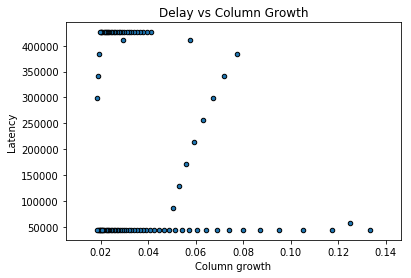

<Figure size 3600x3600 with 0 Axes>

In [17]:
cluster2 = pd.read_csv('timecluster2.csv')

#Plotting timegrowth vs latency in the second cluster
import numpy as np
X = np.array(cluster2.values)
plt.scatter(X[:,7], X[:,9], cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.title('Delay vs Column Growth')
#plt.xlim(-60, 0)
#plt.ylim (0, 100000) #0,1000
plt.xlabel('Column growth')
plt.ylabel('Latency')
plt.figure(figsize=(50,50))

#Results: Column and Time growth are following same trends with latency

<Figure size 3600x3600 with 0 Axes>

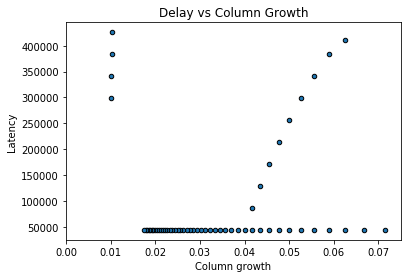

<Figure size 3600x3600 with 0 Axes>

In [18]:
#Plotting columngrowth vs latency in the second cluster

import numpy as np
X = np.array(cluster2.values)
plt.scatter(X[:,3], X[:,9], cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.title('Delay vs Column Growth')
plt.xlim(0,0.075)
#plt.ylim (0, 100000) #0,1000
plt.xlabel('Column growth')
plt.ylabel('Latency')
plt.figure(figsize=(50,50))

#Results: Column and Time growth are following same trends with latency

<Figure size 3600x3600 with 0 Axes>

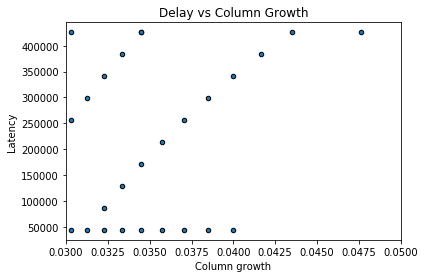

<Figure size 3600x3600 with 0 Axes>

In [19]:
cluster3 = pd.read_csv('timecluster3.csv')

#Plotting column growth vs latency in the third cluster
import numpy as np
X = np.array(cluster3.values)
plt.scatter(X[:,3], X[:,9], cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.title('Delay vs Column Growth')
plt.xlim(0.03,0.05)
#plt.ylim (0, 100000) #0,1000
plt.xlabel('Column growth')
plt.ylabel('Latency')
plt.figure(figsize=(50,50))

<Figure size 3600x3600 with 0 Axes>

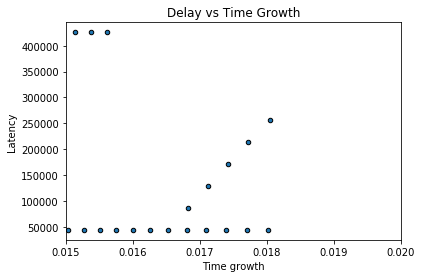

<Figure size 3600x3600 with 0 Axes>

In [20]:
#Plotting timegrowth vs latency in the third cluster
import numpy as np
X = np.array(cluster3.values)
plt.scatter(X[:,7], X[:,9], cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.title('Delay vs Time Growth')
plt.xlim(0.015,0.020)
#plt.ylim (0, 100000) #0,1000
plt.xlabel('Time growth')
plt.ylabel('Latency')
plt.figure(figsize=(50,50))